In [1]:
from tsundoku import hint_xor_model

In [4]:
from nltk import word_tokenize, pos_tag
pos_tag(word_tokenize("And now for something completely different"))

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [9]:
!conda install -c conda-forge matplotlib -y

Solving environment: done

## Package Plan ##

  environment location: /home/kenny/anaconda3/envs/pytorch

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |             py_1           8 KB  conda-forge
    kiwisolver-1.0.1           |py36h6bb024c_1002          84 KB  conda-forge
    matplotlib-3.0.2           |        py36_1002           6 KB  conda-forge
    matplotlib-base-3.0.2      |py36h167e16e_1002         6.6 MB  conda-forge
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    pyparsing-2.3.1            |             py_0          54 KB  conda-forge
    tk-8.6.9                   |    h84994c4_1000         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        13.8 MB

The following NEW packages w

# Overview


- **4.0. Overfitting and Underfitting**
  - 4.0.1. *Network size*
  - 4.0.2. *Weights regularization*
  - 4.0.3. *Dropouts*
<br><br>  

- **4.1. TensorboardX**
  





# 4.0. Over-/Underfitting

**Optimization:** process of adjusting a model to get the best performance possible on the training data

**Generalization:** how well trained model performs on data it has never seen before

#### What to do when model is underfitting (not optimal)?
 - Train longer

#### How to prevent overfitting (i.e. generalize)?
 - Get more data
 - Modulate quantity of information fed to model



# 4.0.1. Network Size 


> *“A **small network**, with say one hidden unit is **likely to be biased**, since the repertoire of available functions spanned by 𝑓(𝑥,𝑤)  over allowable weights will in this case be quite limited.”* 

> “if we **overparameterize, via a large number of hidden units and associated weights**, then bias will be reduced (… with enough weights and hidden units, the network will interpolate the data) but there is then the **danger of significant variance** contribution to the mean-square error”


([German et al. 1992](http://web.mit.edu/6.435/www/Geman92.pdf))

Managing the size/capacity of your network in the model, more accurately the no. of learnable parameters (i.e. no. of layers x no. of units per layer), will (i) ***optimize the network to converge faster*** and/or (ii) ***prevent the network from overfitting to the training data***. To illustrate this point, lets go back to our XOR example.


In [10]:
from tqdm import tqdm
import numpy as np

import torch
from torch import nn
from torch import tensor
from torch import optim

from tensorboardX import SummaryWriter


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12, 8)})


torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# XOR gate inputs and outputs.
X = xor_input = tensor([[0,0], [0,1], [1,0], [1,1]]).float().to(device)
Y = xor_output = tensor([[0],[1],[1],[0]]).float().to(device)

# Use tensor.shape to get the shape of the matrix/tensor.
num_data, input_dim = X.shape
print('Inputs Dim:', input_dim) # i.e. n=2 

num_data, output_dim = Y.shape
print('Output Dim:', output_dim) 
print('No. of Data:', num_data) # i.e. n=4

/home/kenny/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


ModuleNotFoundError: No module named 'seaborn'

## This time lets try different hidden dimensions!

In [3]:
def MLP(hidden_dim, num_epochs=5000):
    # Step 1: Initialization. 
    # Use Sequential to define a simple feed-forward network.
    model = nn.Sequential(
                # Use nn.Linear to get our simple perceptron.
                nn.Linear(input_dim, hidden_dim),
                # Use nn.Sigmoid to get our sigmoid non-linearity.
                nn.Sigmoid(),
                # Second layer neurons.
                nn.Linear(hidden_dim, output_dim),
                nn.Sigmoid()
            )
    # Initialize the optimizer
    learning_rate = 0.3
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    # Initialize the loss function.
    criterion = nn.MSELoss()
    # Initialize the stopping criteria
    # For simplicity, just stop training after certain no. of epochs.
    losses = [] # Keeps track of the loses.
    # Step 2-4 of training routine.
    for _e in tqdm(range(num_epochs)):
        # Reset the gradient after every epoch. 
        optimizer.zero_grad() 
        # Step 2: Foward Propagation
        predictions = model(X)
        # Step 3: Back Propagation 
        # Calculate the cost between the predictions and the truth.
        loss = criterion(predictions, Y)
        # Remember to back propagate the loss you've computed above.
        loss.backward()
        # Step 4: Optimizer take a step and update the weights.
        optimizer.step()
        # Log the loss value as we proceed through the epochs.
        if _e % 100 == 0:
            losses.append(loss.data.item())
    return losses

losses_10 = MLP(hidden_dim=10)
losses_100 = MLP(hidden_dim=100)
losses_200 = MLP(hidden_dim=200)

100%|██████████| 5000/5000 [00:01<00:00, 2761.34it/s]


In [7]:
# Here's some hint if you can't fill up the ??? above. 
hint_xor_model()


**Remember how to initialize the Multi-Layered Perceptron?**

Using the `nn.Sequntial`, chained with repeated `torch.nn.Linear` + `torch.nn.Sigmoid` layers.
<br>
```python
    # Step 1: Initialization.
    # Use Sequential to define a simple feed-forward network.
    model = nn.Sequential(
                # Use nn.Linear to get our simple perceptron.
                nn.Linear(input_dim, hidden_dim),
                # Use nn.Sigmoid to get our sigmoid non-linearity.
                nn.Sigmoid(),
                # Second layer neurons.
                nn.Linear(hidden_dim, output_dim),
                nn.Sigmoid()
            )
```

**Forgotten how to initialize the optimizer and loss function?**

We can use the simple Stochastic Gradient Descent from `torch.optim.SGD`.
And for the loss, the simple Mean Square Error (MSE) aka. L2 Loss with `torchn.nn.MSELoss`.
<br>
```python
# Initialize the optimizer
learning_rate = 0.3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Initialize the loss function.
criterion = nn.MSELoss()
```




## This seems to fit what we learn, 

Small network with limited memorization capacity underfits and takes longer to coverge (i.e. find the minimum loss).

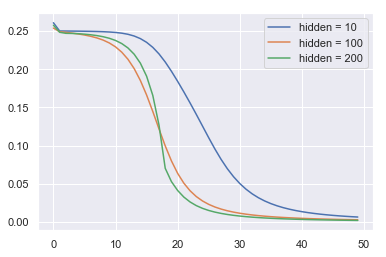

In [8]:
plt.plot(losses_10,  label='hidden = 10')
plt.plot(losses_100, label='hidden = 100')
plt.plot(losses_200, label='hidden = 200')
plt.legend(loc='upper right')
plt.show()

## Now, let's try some larger no. of units

In [9]:
losses_300 = MLP(hidden_dim=300)
losses_1000 = MLP(hidden_dim=1000)
losses_2000 = MLP(hidden_dim=2000)


100%|██████████| 5000/5000 [00:03<00:00, 1610.77it/s]


## Hey now the curves of larger networks look funky =)

Larger network will converge faster until a certain capacity sweetspot; `hidden_dim=200` converges faster than `hidden_dim=100`, and once it gets to `hidden>=300`, the training loss gets funky.

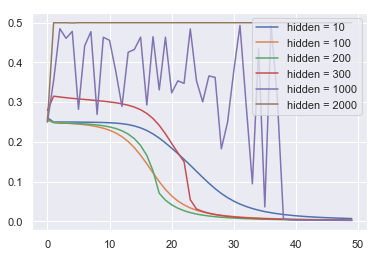

In [10]:
plt.plot(losses_10,  label='hidden = 10')
plt.plot(losses_100, label='hidden = 100')
plt.plot(losses_200, label='hidden = 200')
plt.plot(losses_300, label='hidden = 300')
plt.plot(losses_1000, label='hidden = 1000')
plt.plot(losses_2000, label='hidden = 2000')
plt.legend(loc='upper right')
plt.show()

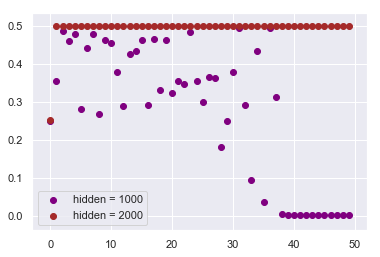

In [11]:
plt.scatter(range(len(losses_1000)), losses_1000, label='hidden = 1000', color='purple')
plt.scatter(range(len(losses_2000)), losses_2000, label='hidden = 2000', color='brown')
plt.legend(loc='lower left')
plt.show()



## Summary:

1. Small network <u>underfits</u> (longer to converge)
2. larger network easier to converge
3. Too large network <u>overfits</u> 
4. Too too large network don't train properly at all.

# 4.0.2. Weights regularization


<img src="https://micksphotoblog.com/wp-content/uploads/2018/09/Occams-Professor.gif" width="500" align="left">


The simpler solution is better because makes fewer assumptions. Simpler models are less likely to overfit than complex ones.

By adding a cost associated with large weights, **weights regularization** forces the model weights to take smaller values. 

- ***L1 regularization***: Cost is proportional to the absolute value of the weight coefficient. 

- ***L2 regularization***: Cost is proportional to the square value of the weight coefficient. (L2 regularization is also call *weight decay*

In `PyTorch`, the regularization is a parameter in the optimizer, e.g.

```python
# Using the L2 regularization.
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-5)
```

IMHO, in practice, I (personally) never tune weights regularization. Other regularization methods gives you better result. L1 Loss is messy in PyTorch, so we'll skip that for now =)


In [12]:
def MLP_L2Loss(hidden_dim, num_epochs=5000, weight_decay=1e-4):
    # Step 1: Initialization. 
    # Use Sequential to define a simple feed-forward network.
    model = nn.Sequential(
                # Use nn.Linear to get our simple perceptron.
                nn.Linear(input_dim, hidden_dim),
                # Use nn.Sigmoid to get our sigmoid non-linearity.
                nn.Sigmoid(),
                # Second layer neurons.
                nn.Linear(hidden_dim, output_dim),
                nn.Sigmoid()
            )
    # Initialize the optimizer
    learning_rate = 0.3
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    # Initialize the loss function.
    criterion = nn.MSELoss()
    # Initialize the stopping criteria
    # For simplicity, just stop training after certain no. of epochs.
    losses = [] # Keeps track of the loses.
    # Step 2-4 of training routine.
    for _e in tqdm(range(num_epochs)):
        # Reset the gradient after every epoch. 
        optimizer.zero_grad() 
        # Step 2: Foward Propagation
        predictions = model(X)
        # Step 3: Back Propagation 
        # Calculate the cost between the predictions and the truth.
        loss = criterion(predictions, Y)
        # Remember to back propagate the loss you've computed above.
        loss.backward()
        # Step 4: Optimizer take a step and update the weights.
        optimizer.step()
        # Log the loss value as we proceed through the epochs.
        if _e % 100 == 0:
            losses.append(loss.data.item())
    return losses


In [13]:
# Not much different, but subjected to some randomness...
loss_normal = MLP(200)
loss_l2 = MLP_L2Loss(200)

100%|██████████| 5000/5000 [00:02<00:00, 2020.75it/s]


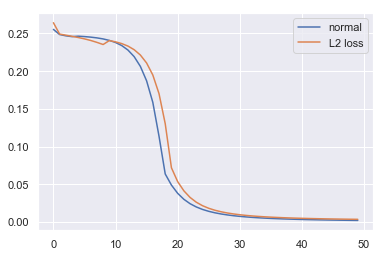

In [14]:
plt.plot(loss_normal,  label='normal')
plt.plot(loss_l2, label='L2 loss')
plt.legend(loc='upper right')
plt.show()

# 4.0.3. Dropout

**Dropout** is the poster boy of neural network regularization. Geoffrey Hinton on bank's fraud prevention mechanism:

> *"I went to my bank. The tellers kept changing and I asked one of them why. He said he didn't know but they got moved around a lot. 
>
> I figured it must be because it would require cooperation between employees to succesfully defraud the bank. 
>
> This made me realize that randomly removing a difference subsset of neurons on each example would prevent conspiracies and thus reduce overfitting"

[Geoffrey Hinton (in Reddit AMA)](https://www.reddit.com/r/MachineLearning/comments/4w6tsv/ama_we_are_the_google_brain_team_wed_love_to/)


To prevent the model from over-memorizing the data, adding random zero-ing noise to the output values of the layer will prevent *"conspiracies among neurons"*.

In [15]:
def MLP_Dropout(hidden_dim, num_epochs=5000, dropout=0.5):
    # Step 1: Initialization. 
    # Use Sequential to define a simple feed-forward network.
    model = nn.Sequential(
                # Use nn.Linear to get our simple perceptron.
                nn.Linear(input_dim, hidden_dim),
                # Use nn.Sigmoid to get our sigmoid non-linearity.
                nn.Sigmoid(),
                nn.Dropout(dropout), 
                # Second layer neurons.
                nn.Linear(hidden_dim, output_dim),
                nn.Sigmoid()
            )
    # Initialize the optimizer
    learning_rate = 0.3
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    # Initialize the loss function.
    criterion = nn.MSELoss()
    # Initialize the stopping criteria
    # For simplicity, just stop training after certain no. of epochs.
    losses = [] # Keeps track of the loses.
    # Step 2-4 of training routine.
    for _e in tqdm(range(num_epochs)):
        # Reset the gradient after every epoch. 
        optimizer.zero_grad() 
        # Step 2: Foward Propagation
        predictions = model(X)
        # Step 3: Back Propagation 
        # Calculate the cost between the predictions and the truth.
        loss = criterion(predictions, Y)
        # Remember to back propagate the loss you've computed above.
        loss.backward()
        # Step 4: Optimizer take a step and update the weights.
        optimizer.step()
        # Log the loss value as we proceed through the epochs.
        if _e % 100 == 0:
            losses.append(loss.data.item())
    return losses


In [16]:
loss_normal = MLP(500)
loss_droptout = MLP_Dropout(500, dropout=0.5)

100%|██████████| 5000/5000 [00:03<00:00, 1457.30it/s]


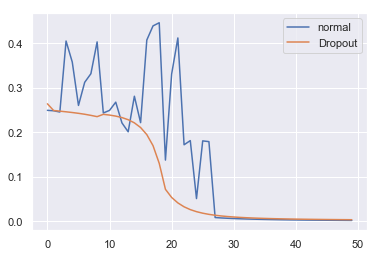

In [17]:
# Even at higher no. of parameter, 
# training is stable with quite a high dropout.
plt.plot(loss_normal,  label='normal')
plt.plot(loss_l2, label='Dropout')
plt.legend(loc='upper right')
plt.show()

# TensorboardX


Using `TensorboardX` (https://github.com/lanpa/tensorboardX), a PyTorch wrapper for https://www.tensorflow.org/guide/summaries_and_tensorboard


In command line:

```
tensorboard --logdir='./logs' --po--reload_interval --port 6006
```


Then open a page on the browser to:

```
localhost:6006
```

Then run the code below

In [ ]:

gradients = []
hidden_dim = 2000
num_epochs = 5000

writer = SummaryWriter('./logs')


# Step 1: Initialization. 
# Use Sequential to define a simple feed-forward network.
model = nn.Sequential(
            # Use nn.Linear to get our simple perceptron.
            nn.Linear(input_dim, hidden_dim),
            # Use nn.Sigmoid to get our sigmoid non-linearity.
            nn.Sigmoid(),
            # Second layer neurons.
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )
# Initialize the optimizer
learning_rate = 0.3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Initialize the loss function.
criterion = nn.MSELoss()

writer.add_graph(model, torch.zeros(*X.shape), True)

# Initialize the stopping criteria
# For simplicity, just stop training after certain no. of epochs.
losses = [] # Keeps track of the loses.
# Step 2-4 of training routine.
for _e in tqdm(range(num_epochs)):
    # Reset the gradient after every epoch. 
    optimizer.zero_grad() 
    # Step 2: Foward Propagation
    predictions = model(X)
    
    for name, param in model.named_parameters():
        writer.add_histogram(name, param.clone().cpu().data.numpy(), _e)
    
    # Step 3: Back Propagation 
    # Calculate the cost between the predictions and the truth.
    loss = criterion(predictions, Y)
    # Remember to back propagate the loss you've computed above.
    loss.backward()
    # Step 4: Optimizer take a step and update the weights.
    optimizer.step()
    # Log the loss value as we proceed through the epochs.
    if _e % 100 == 0:
        losses.append(loss.data.item())
        writer.add_scalar('Train/Loss', loss.data.item(), _e)

writer.close()

# Now lets use TensorboardX on Word2Vec

Go back to Session3 code, recode these components:

 - Get the data from `Language is never ever random`.
 - Recode the `Word2VecDataset`
 - Recode the `CBOW` and `Skipgram` models
 - Recode the training routine, `model(x); loss.backward(); optimizer.step()` etc. 

On top of that launch the TensorboardX and see explore.